🚀 SETUP INICIAL - TREINAMENTO YOLO

📂 Montando Google Drive...
Mounted at /content/drive
✅ Drive montado!

📦 Instalando dependências...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 29.8 MB/s eta 0:00:00
✅ Dependências instaladas!

🖥️  Hardware:
   GPU disponível: True
   GPU: Tesla T4
   Memória GPU: 15.83 GB

📂 PREPARANDO DATASET

📍 Caminhos:
   ZIP: /content/drive/MyDrive/document-classifier/data/bid_yolo_dataset.zip
   Destino: /content/bid_yolo
✅ ZIP encontrado! Tamanho: 6773.33 MB

📦 Descompactando dataset...
   (Isso pode levar 1-2 minutos...)
✅ Dataset descompactado!

🔍 Verificando estrutura...
total 12K
-rw-r--r-- 1 root root  189 Jan 28 12:00 data.yaml
drwxr-xr-x 5 root root 4.0K Jan 28 12:02 images
drwxr-xr-x 5 root root 4.0K Jan 28 12:02 labels

📊 Distribuição do dataset:
   Train: 20160 imagens
   Val:   5760 imagens
   Test:  2880 imagens
   Total: 28800 imagens

📄 Conteúdo do data.yaml:
path: /content/bid_yolo
train: images/train
val: images/val
test: images/tes

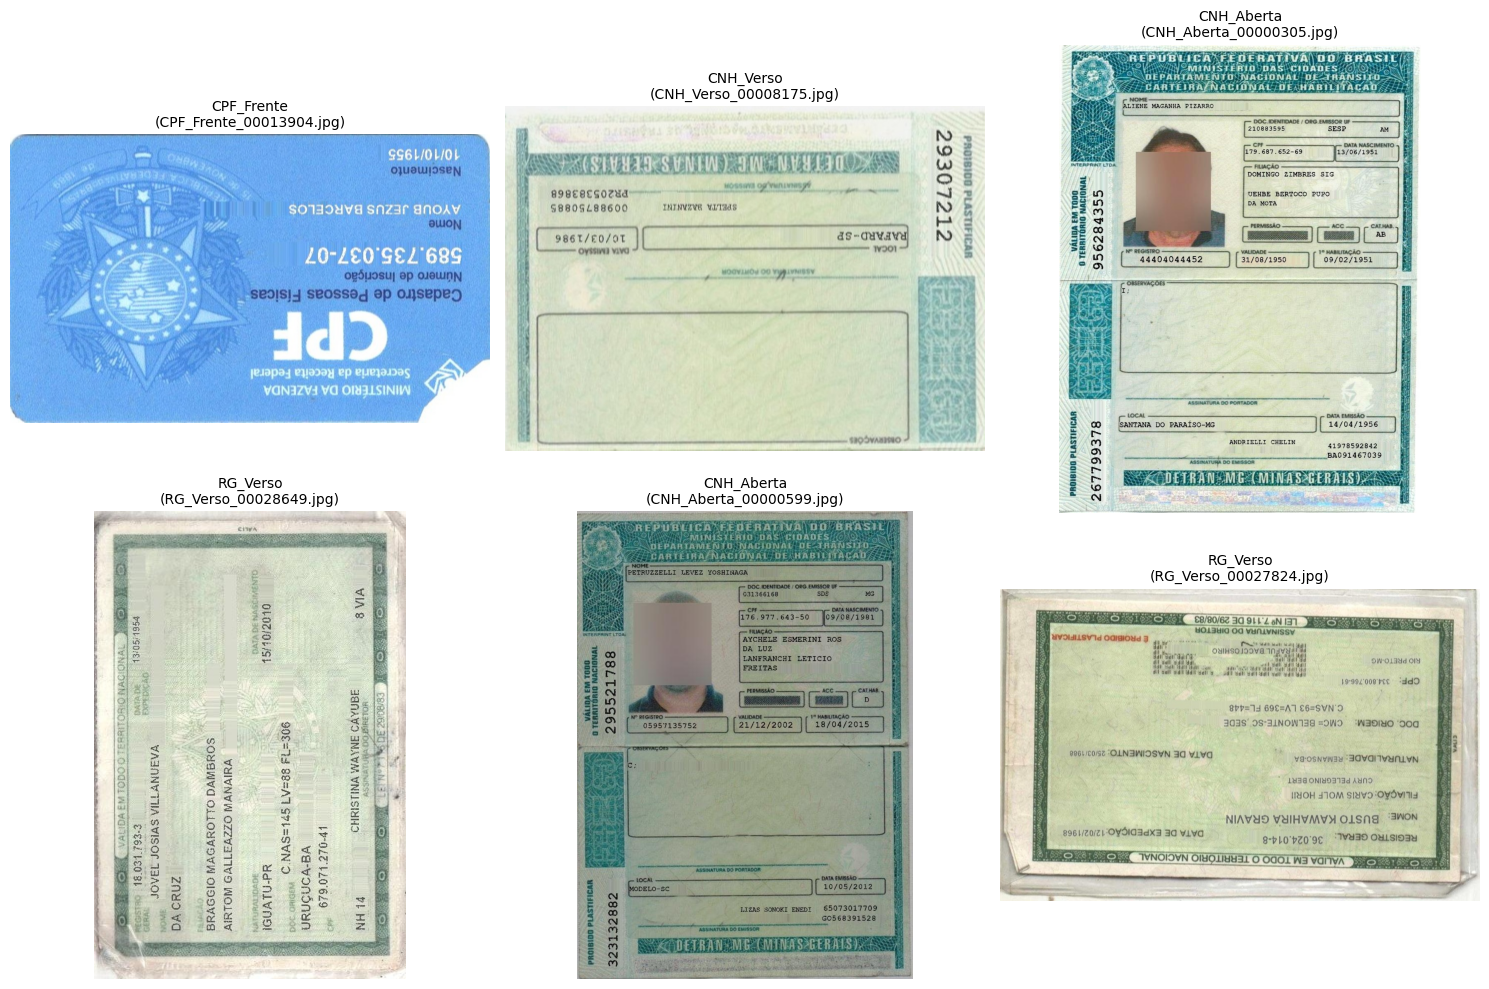


✅ Amostras salvas em: /content/dataset_samples.png

⚙️ CONFIGURANDO TREINAMENTO
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

📋 Configurações do treinamento:
   model               : yolov8n.pt
   data                : /content/bid_yolo/data.yaml
   epochs              : 50
   imgsz               : 640
   batch               : 16
   optimizer           : AdamW
   lr0                 : 0.001
   lrf                 : 0.01
   momentum            : 0.937
   weight_decay        : 0.0005
   patience            : 10
   project             : /content/runs
   name                : doc_classifier
   save                : True
   save_period         : 10
   device              : 0
   workers             : 8
   verbose             : Tr

/tmp/ipython-input-818661487.py:382: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-818661487.py:383: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.savefig('/content/test_predictions.png', dpi=150, bbox_inches='tight')
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


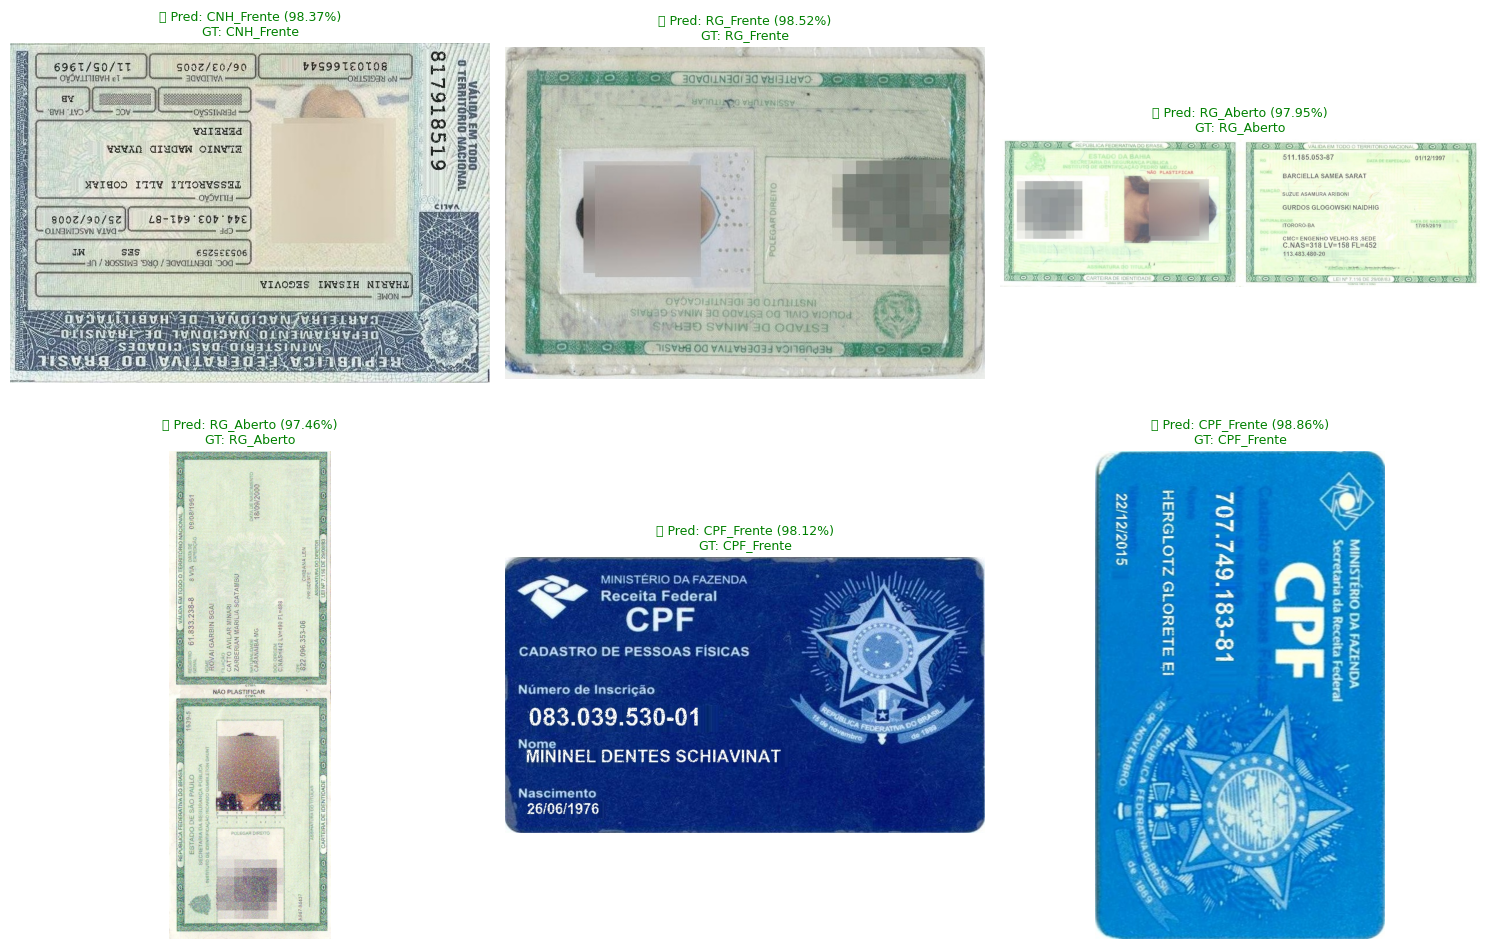


✅ Predições salvas em: /content/test_predictions.png

📈 GRÁFICOS DE TREINAMENTO

💾 SALVANDO MODELO NO GOOGLE DRIVE

📦 Copiando arquivos...
   ✅ Melhor modelo: best.pt
   ✅ Último checkpoint: last.pt
   ⚠️  Gráfico de resultados não encontrado: results.png
   ⚠️  Matriz de confusão não encontrado: confusion_matrix.png
   ⚠️  Curva PR não encontrado: PR_curve.png
   ⚠️  Curva F1 não encontrado: F1_curve.png
   ✅ Configurações: config.json
   ✅ Métricas: metrics.txt

✅ Tudo salvo em: /content/drive/MyDrive/document-classifier/models/yolo_doc_classifier
   Tamanho do modelo: 17.59 MB

🎉 RESUMO FINAL

✅ Etapas Concluídas:
   [✓] Dataset descompactado
   [✓] Modelo treinado por 50 épocas
   [✓] Modelo avaliado no conjunto de teste
   [✓] Predições testadas em imagens reais
   [✓] Gráficos gerados
   [✓] Modelo salvo no Google Drive

📊 Resultados:
   mAP@0.5: 99.50%
   Precisão: 99.95%
   Recall: 99.99%

📂 Arquivos Importantes:
   Modelo: /content/drive/MyDrive/document-classifier/models/yol

In [ ]:
"""
TREINAMENTO YOLO - CLASSIFICAÇÃO DE DOCUMENTOS BRASILEIROS
============================================================

Este notebook treina um modelo YOLOv8 para classificar documentos
brasileiros (CNH, RG, CPF) usando o BID Dataset.

Pré-requisitos:
- Dataset YOLO zipado no Google Drive
- GPU habilitada no Colab (Runtime > Change runtime type > GPU)

Tempo estimado: 2-4 horas
"""

# ============================================================================
# PARTE 1: SETUP INICIAL
# ============================================================================

print("="*70)
print("🚀 SETUP INICIAL - TREINAMENTO YOLO")
print("="*70)

# 1.1 Montar Google Drive
print("\n📂 Montando Google Drive...")
from google.colab import drive
drive.mount('/content/drive')
print("✅ Drive montado!")

# 1.2 Instalar dependências
print("\n📦 Instalando dependências...")
!pip install -q ultralytics

print("✅ Dependências instaladas!")

# 1.3 Verificar GPU
import torch
print(f"\n🖥️  Hardware:")
print(f"   GPU disponível: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"   GPU: {torch.cuda.get_device_name(0)}")
    print(f"   Memória GPU: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")
else:
    print("   ⚠️  GPU NÃO DETECTADA! Vá em Runtime > Change runtime type > GPU")

# ============================================================================
# PARTE 2: PREPARAR DATASET
# ============================================================================

print("\n" + "="*70)
print("📂 PREPARANDO DATASET")
print("="*70)

# 2.1 Configurar caminhos
ZIP_PATH = "/content/drive/MyDrive/document-classifier/data/bid_yolo_dataset.zip"
EXTRACT_PATH = "/content/bid_yolo"

print(f"\n📍 Caminhos:")
print(f"   ZIP: {ZIP_PATH}")
print(f"   Destino: {EXTRACT_PATH}")

# 2.2 Verificar se ZIP existe
from pathlib import Path
if not Path(ZIP_PATH).exists():
    print(f"\n❌ ERRO: ZIP não encontrado!")
    print(f"   Verifique o caminho: {ZIP_PATH}")
    print(f"   Execute primeiro o notebook de conversão do dataset.")
    raise FileNotFoundError(f"Dataset ZIP não encontrado: {ZIP_PATH}")

print(f"✅ ZIP encontrado! Tamanho: {Path(ZIP_PATH).stat().st_size / (1024**2):.2f} MB")

# 2.3 Descompactar dataset
print(f"\n📦 Descompactando dataset...")
print(f"   (Isso pode levar 1-2 minutos...)")

import zipfile
import shutil

# Limpar pasta anterior se existir
if Path(EXTRACT_PATH).exists():
    print(f"   🧹 Limpando pasta anterior...")
    shutil.rmtree(EXTRACT_PATH)

# Descompactar
with zipfile.ZipFile(ZIP_PATH, 'r') as zip_ref:
    zip_ref.extractall(EXTRACT_PATH)

print(f"✅ Dataset descompactado!")

# 2.4 Verificar estrutura
print(f"\n🔍 Verificando estrutura...")
!ls -lh {EXTRACT_PATH}/

# Contar imagens
import os
n_train = len(os.listdir(f"{EXTRACT_PATH}/images/train"))
n_val = len(os.listdir(f"{EXTRACT_PATH}/images/val"))
n_test = len(os.listdir(f"{EXTRACT_PATH}/images/test"))

print(f"\n📊 Distribuição do dataset:")
print(f"   Train: {n_train} imagens")
print(f"   Val:   {n_val} imagens")
print(f"   Test:  {n_test} imagens")
print(f"   Total: {n_train + n_val + n_test} imagens")

# 2.5 Visualizar data.yaml
print(f"\n📄 Conteúdo do data.yaml:")
!cat {EXTRACT_PATH}/data.yaml

# ============================================================================
# PARTE 3: VISUALIZAR AMOSTRAS DO DATASET
# ============================================================================

print("\n" + "="*70)
print("👀 VISUALIZANDO AMOSTRAS DO DATASET")
print("="*70)

import cv2
import matplotlib.pyplot as plt
from PIL import Image
import random

def visualize_samples(dataset_path, num_samples=6):
    """Visualiza amostras do dataset com suas labels"""

    images_dir = Path(dataset_path) / 'images' / 'train'
    labels_dir = Path(dataset_path) / 'labels' / 'train'

    # Pegar amostras aleatórias
    all_images = list(images_dir.glob('*.jpg'))
    samples = random.sample(all_images, min(num_samples, len(all_images)))

    # Ler classes do data.yaml
    import yaml
    with open(Path(dataset_path) / 'data.yaml', 'r') as f:
        data_config = yaml.safe_load(f)
    class_names = data_config['names']

    # Criar subplot
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()

    for idx, img_path in enumerate(samples):
        # Carregar imagem
        img = Image.open(img_path)

        # Ler label
        label_path = labels_dir / f"{img_path.stem}.txt"
        with open(label_path, 'r') as f:
            label_line = f.readline().strip()

        class_id = int(label_line.split()[0])
        class_name = class_names[class_id]

        # Mostrar
        axes[idx].imshow(img)
        axes[idx].set_title(f'{class_name}\n({img_path.name})', fontsize=10)
        axes[idx].axis('off')

    plt.tight_layout()
    plt.savefig('/content/dataset_samples.png', dpi=150, bbox_inches='tight')
    plt.show()

    print(f"\n✅ Amostras salvas em: /content/dataset_samples.png")

# Visualizar
visualize_samples(EXTRACT_PATH, num_samples=6)

# ============================================================================
# PARTE 4: CONFIGURAR TREINAMENTO
# ============================================================================

print("\n" + "="*70)
print("⚙️ CONFIGURANDO TREINAMENTO")
print("="*70)

from ultralytics import YOLO

# 4.1 Configurações
CONFIG = {
    # Modelo base
    'model': 'yolov8n.pt',  # nano (rápido) | yolov8s.pt (balanced) | yolov8m.pt (preciso)

    # Dados
    'data': f'{EXTRACT_PATH}/data.yaml',

    # Treinamento
    'epochs': 50,           # Número de épocas (aumente para 100 se tiver tempo)
    'imgsz': 640,          # Tamanho da imagem
    'batch': 16,           # Batch size (reduzir para 8 se der OOM)

    # Otimizador
    'optimizer': 'AdamW',
    'lr0': 0.001,          # Learning rate inicial
    'lrf': 0.01,           # Learning rate final
    'momentum': 0.937,
    'weight_decay': 0.0005,

    # Early stopping
    'patience': 10,        # Para após 10 épocas sem melhora

    # Salvamento
    'project': '/content/runs',
    'name': 'doc_classifier',
    'save': True,
    'save_period': 10,     # Salvar checkpoint a cada 10 épocas

    # Hardware
    'device': 0,           # GPU 0
    'workers': 8,          # Threads de carregamento de dados

    # Logging
    'verbose': True,
    'plots': True,

    # Data Augmentation
    'hsv_h': 0.015,       # Ajuste de matiz
    'hsv_s': 0.7,         # Ajuste de saturação
    'hsv_v': 0.4,         # Ajuste de valor
    'degrees': 10,        # Rotação máxima
    'translate': 0.1,     # Translação
    'scale': 0.5,         # Escala
    'flipud': 0.0,        # Flip vertical (desabilitado para documentos)
    'fliplr': 0.5,        # Flip horizontal
    'mosaic': 1.0,        # Mosaic augmentation
    'mixup': 0.0,         # Mixup (desabilitado)
}

print(f"\n📋 Configurações do treinamento:")
for key, value in CONFIG.items():
    print(f"   {key:20s}: {value}")

# ============================================================================
# PARTE 5: TREINAR MODELO
# ============================================================================

print("\n" + "="*70)
print("🚀 INICIANDO TREINAMENTO")
print("="*70)
print(f"\n⏱️  Tempo estimado: 2-4 horas (depende da GPU)")
print(f"📊 Progresso será exibido abaixo")
print(f"💾 Checkpoints serão salvos automaticamente")
print(f"\n{'='*70}\n")

# Carregar modelo
print(f"📥 Carregando modelo base: {CONFIG['model']}...")
model = YOLO(CONFIG['model'])
print(f"✅ Modelo carregado!\n")

# TREINAR
try:
    results = model.train(**CONFIG)

    print(f"\n{'='*70}")
    print(f"✅ TREINAMENTO CONCLUÍDO COM SUCESSO!")
    print(f"{'='*70}")

except KeyboardInterrupt:
    print(f"\n⚠️  Treinamento interrompido pelo usuário")
    print(f"   Checkpoint salvo em: /content/runs/doc_classifier/weights/last.pt")
    print(f"   Para retomar: model = YOLO('last.pt'); model.train(resume=True)")

except Exception as e:
    print(f"\n❌ ERRO durante o treinamento:")
    print(f"   {e}")
    import traceback
    traceback.print_exc()

# ============================================================================
# PARTE 6: AVALIAR MODELO
# ============================================================================

print("\n" + "="*70)
print("📊 AVALIAÇÃO DO MODELO")
print("="*70)

# Carregar melhor modelo
best_model_path = '/content/runs/doc_classifier/weights/best.pt'

if Path(best_model_path).exists():
    print(f"\n📥 Carregando melhor modelo...")
    best_model = YOLO(best_model_path)

    # Validar no conjunto de teste
    print(f"\n🧪 Avaliando no conjunto de teste...")
    metrics = best_model.val(
        data=CONFIG['data'],
        split='test',
        verbose=True
    )

    # Mostrar métricas principais
    print(f"\n{'='*70}")
    print(f"📈 MÉTRICAS FINAIS")
    print(f"{'='*70}")
    print(f"\n🎯 Métricas Gerais:")
    print(f"   mAP@0.5:      {metrics.box.map50:.4f} ({metrics.box.map50*100:.2f}%)")
    print(f"   mAP@0.5:0.95: {metrics.box.map:.4f} ({metrics.box.map*100:.2f}%)")
    print(f"   Precision:    {metrics.box.mp:.4f} ({metrics.box.mp*100:.2f}%)")
    print(f"   Recall:       {metrics.box.mr:.4f} ({metrics.box.mr*100:.2f}%)")

    # Métricas por classe
    print(f"\n📋 Métricas por Classe:")
    for i, class_name in enumerate(best_model.names.values()):
        print(f"   {class_name:20s}: mAP = {metrics.box.maps[i]:.4f} ({metrics.box.maps[i]*100:.2f}%)")

    # Avaliar qualidade
    print(f"\n🏆 Avaliação:")
    if metrics.box.map50 > 0.95:
        print(f"   ✅ EXCELENTE! mAP > 95%")
    elif metrics.box.map50 > 0.90:
        print(f"   ✅ MUITO BOM! mAP > 90%")
    elif metrics.box.map50 > 0.85:
        print(f"   ⚠️  BOM, mas pode melhorar (mAP > 85%)")
    else:
        print(f"   ❌ PRECISA MELHORAR (mAP < 85%)")
        print(f"   Sugestões:")
        print(f"   - Treinar por mais épocas")
        print(f"   - Usar modelo maior (yolov8s ou yolov8m)")
        print(f"   - Ajustar hiperparâmetros")

else:
    print(f"\n⚠️  Modelo não encontrado em: {best_model_path}")
    print(f"   Verifique se o treinamento foi concluído")

# ============================================================================
# PARTE 7: TESTAR EM IMAGENS
# ============================================================================

print("\n" + "="*70)
print("🧪 TESTANDO EM IMAGENS REAIS")
print("="*70)

if Path(best_model_path).exists():
    import matplotlib.pyplot as plt
    from PIL import Image
    import random

    # Pegar imagens aleatórias do teste
    test_images_dir = Path(f'{EXTRACT_PATH}/images/test')
    test_images = list(test_images_dir.glob('*.jpg'))
    sample_images = random.sample(test_images, min(6, len(test_images)))

    # Testar
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()

    for idx, img_path in enumerate(sample_images):
        # Prever
        results = best_model(str(img_path), conf=0.5, verbose=False)

        # Carregar imagem
        img = Image.open(img_path)

        # Extrair predição
        boxes = results[0].boxes
        if len(boxes) > 0:
            class_id = int(boxes.cls[0])
            confidence = float(boxes.conf[0])
            class_name = best_model.names[class_id]

            # Extrair ground truth
            label_path = Path(f'{EXTRACT_PATH}/labels/test') / f"{img_path.stem}.txt"
            with open(label_path, 'r') as f:
                gt_class_id = int(f.readline().split()[0])
            gt_class_name = best_model.names[gt_class_id]

            # Determinar se está correto
            is_correct = (class_id == gt_class_id)
            color = 'green' if is_correct else 'red'
            symbol = '✅' if is_correct else '❌'

            title = f"{symbol} Pred: {class_name} ({confidence:.2%})\nGT: {gt_class_name}"
        else:
            title = "❌ Nenhuma detecção"
            color = 'red'

        # Mostrar
        axes[idx].imshow(img)
        axes[idx].set_title(title, fontsize=9, color=color)
        axes[idx].axis('off')

    plt.tight_layout()
    plt.savefig('/content/test_predictions.png', dpi=150, bbox_inches='tight')
    plt.show()

    print(f"\n✅ Predições salvas em: /content/test_predictions.png")

# ============================================================================
# PARTE 8: VISUALIZAR GRÁFICOS DE TREINAMENTO
# ============================================================================

print("\n" + "="*70)
print("📈 GRÁFICOS DE TREINAMENTO")
print("="*70)

results_dir = Path('/content/runs/doc_classifier')

if results_dir.exists():
    # Gráfico de resultados
    results_img = results_dir / 'results.png'
    if results_img.exists():
        print(f"\n📊 Curvas de Treinamento:")
        img = Image.open(results_img)
        plt.figure(figsize=(15, 10))
        plt.imshow(img)
        plt.axis('off')
        plt.tight_layout()
        plt.show()

    # Matriz de confusão
    confusion_img = results_dir / 'confusion_matrix.png'
    if confusion_img.exists():
        print(f"\n🔀 Matriz de Confusão:")
        img = Image.open(confusion_img)
        plt.figure(figsize=(10, 10))
        plt.imshow(img)
        plt.axis('off')
        plt.tight_layout()
        plt.show()

    # Curva PR
    pr_curve_img = results_dir / 'PR_curve.png'
    if pr_curve_img.exists():
        print(f"\n📉 Curva Precision-Recall:")
        img = Image.open(pr_curve_img)
        plt.figure(figsize=(10, 8))
        plt.imshow(img)
        plt.axis('off')
        plt.tight_layout()
        plt.show()

# ============================================================================
# PARTE 9: SALVAR MODELO NO GOOGLE DRIVE
# ============================================================================

print("\n" + "="*70)
print("💾 SALVANDO MODELO NO GOOGLE DRIVE")
print("="*70)

import shutil

# Configurar destino
DRIVE_MODEL_DIR = "/content/drive/MyDrive/document-classifier/models/yolo_doc_classifier"

# Criar pasta
Path(DRIVE_MODEL_DIR).mkdir(parents=True, exist_ok=True)

if Path(best_model_path).exists():
    # Copiar pesos
    print(f"\n📦 Copiando arquivos...")

    files_to_copy = {
        'best.pt': 'Melhor modelo',
        'last.pt': 'Último checkpoint',
        'results.png': 'Gráfico de resultados',
        'confusion_matrix.png': 'Matriz de confusão',
        'PR_curve.png': 'Curva PR',
        'F1_curve.png': 'Curva F1'
    }

    for filename, description in files_to_copy.items():
        src = results_dir / 'weights' / filename if filename.endswith('.pt') else results_dir / filename
        dst = Path(DRIVE_MODEL_DIR) / filename

        if src.exists():
            shutil.copy(src, dst)
            print(f"   ✅ {description}: {filename}")
        else:
            print(f"   ⚠️  {description} não encontrado: {filename}")

    # Salvar configurações
    import json
    config_path = Path(DRIVE_MODEL_DIR) / 'config.json'
    with open(config_path, 'w') as f:
        json.dump(CONFIG, f, indent=2)
    print(f"   ✅ Configurações: config.json")

    # Salvar métricas
    if Path(best_model_path).exists():
        metrics_path = Path(DRIVE_MODEL_DIR) / 'metrics.txt'
        with open(metrics_path, 'w') as f:
            f.write(f"MÉTRICAS FINAIS\n")
            f.write(f"="*50 + "\n\n")
            f.write(f"mAP@0.5:      {metrics.box.map50:.4f} ({metrics.box.map50*100:.2f}%)\n")
            f.write(f"mAP@0.5:0.95: {metrics.box.map:.4f} ({metrics.box.map*100:.2f}%)\n")
            f.write(f"Precision:    {metrics.box.mp:.4f} ({metrics.box.mp*100:.2f}%)\n")
            f.write(f"Recall:       {metrics.box.mr:.4f} ({metrics.box.mr*100:.2f}%)\n\n")
            f.write(f"MÉTRICAS POR CLASSE\n")
            f.write(f"="*50 + "\n\n")
            for i, class_name in enumerate(best_model.names.values()):
                f.write(f"{class_name:20s}: {metrics.box.maps[i]:.4f} ({metrics.box.maps[i]*100:.2f}%)\n")
        print(f"   ✅ Métricas: metrics.txt")

    print(f"\n✅ Tudo salvo em: {DRIVE_MODEL_DIR}")
    print(f"   Tamanho do modelo: {Path(DRIVE_MODEL_DIR, 'best.pt').stat().st_size / (1024**2):.2f} MB")

else:
    print(f"\n⚠️  Modelo não encontrado. Treinamento pode não ter sido concluído.")

# ============================================================================
# PARTE 10: RESUMO FINAL
# ============================================================================

print("\n" + "="*70)
print("🎉 RESUMO FINAL")
print("="*70)

print(f"\n✅ Etapas Concluídas:")
print(f"   [✓] Dataset descompactado")
print(f"   [✓] Modelo treinado por {CONFIG['epochs']} épocas")
print(f"   [✓] Modelo avaliado no conjunto de teste")
print(f"   [✓] Predições testadas em imagens reais")
print(f"   [✓] Gráficos gerados")
print(f"   [✓] Modelo salvo no Google Drive")

if Path(best_model_path).exists():
    print(f"\n📊 Resultados:")
    print(f"   mAP@0.5: {metrics.box.map50*100:.2f}%")
    print(f"   Precisão: {metrics.box.mp*100:.2f}%")
    print(f"   Recall: {metrics.box.mr*100:.2f}%")

print(f"\n📂 Arquivos Importantes:")
print(f"   Modelo: {DRIVE_MODEL_DIR}/best.pt")
print(f"   Métricas: {DRIVE_MODEL_DIR}/metrics.txt")
print(f"   Gráficos: {DRIVE_MODEL_DIR}/results.png")

print(f"\n🚀 Próximos Passos:")
print(f"   1. Revisar métricas e gráficos")
print(f"   2. Se mAP < 90%, considere treinar mais ou usar modelo maior")
print(f"   3. Integrar modelo no pipeline completo")
print(f"   4. Treinar detector de spotlight (se ainda não fez)")
print(f"   5. Implementar pipeline de inferência completo")

print(f"\n" + "="*70)
print(f"✨ TREINAMENTO FINALIZADO!")
print(f"="*70)

# ============================================================================
# CÓDIGO EXTRA: COMO USAR O MODELO TREINADO
# ============================================================================

print(f"\n📝 COMO USAR O MODELO TREINADO:")
print(f"""
# Carregar modelo
from ultralytics import YOLO
model = YOLO('{DRIVE_MODEL_DIR}/best.pt')

# Prever em uma imagem
results = model('caminho/para/imagem.jpg')

# Extrair informações
boxes = results[0].boxes
if len(boxes) > 0:
    class_id = int(boxes.cls[0])
    confidence = float(boxes.conf[0])
    class_name = model.names[class_id]

    print(f"Documento: {{class_name}}")
    print(f"Confiança: {{confidence:.2%}}")
""")